In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv("heart.csv")
o2sat_df = pd.read_csv("o2Saturation.csv")

### Let's check the data

In [3]:
print(f'Shape of Heart DataSet is: {heart_df.shape}')
print(f'Shape of Oxygen Saturation Dataset: {o2sat_df.shape}')

Shape of Heart DataSet is: (303, 14)
Shape of Oxygen Saturation Dataset: (3585, 1)


In [4]:
heart_df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Brief Description of the columns
<p>Sex:</p> 
<p>Cp: Chest Pain Level</p>
<p>trtbps: Resting Blood Pressure in mm/Hg</p>
<p>chol: Cholesterol in mg/dl</p>
<p>fbs: fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</p>
<p>restecg: resting ECG results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
</p>
<p>thalachh: maximum heart rate achieved</p>
<p>exng: exercise induced angina</p>
<p>oldpeak: previous peak</p>
<p>slp slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping</p>
<p>ca: number of major vessels (0-3) colored by flourosopy</p>
<p>thall 3 = normal; 6 = fixed defect; 7 = reversable defect</p>
<p>output: Heart attack or not</p>

In [5]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

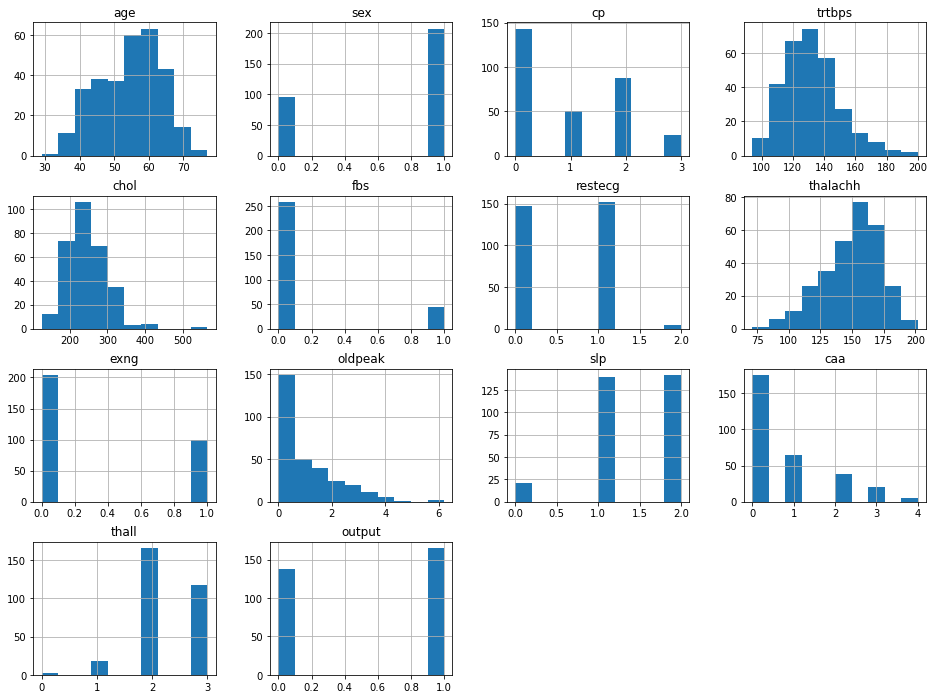

In [6]:
heart_df.hist(figsize = (16,12))

# Age and Heart Attack

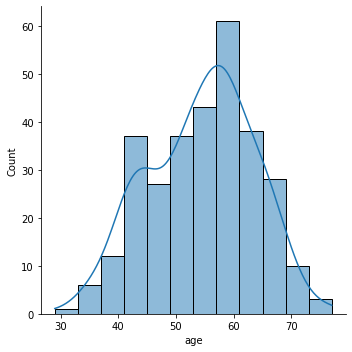

In [7]:
sns.displot(heart_df.age,kde=True)

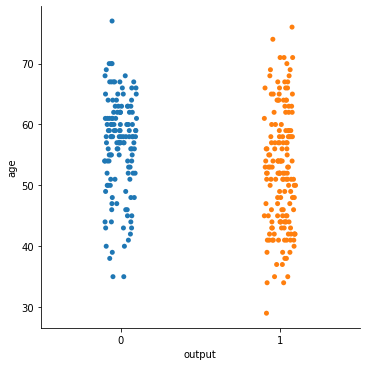

In [8]:
sns.catplot(x="output",y="age",data=heart_df)

# Sex and Heart Attack

In [9]:
totalMale = (heart_df.sex == 1).sum()
maleTrue = ((heart_df.sex==1) & (heart_df.output == 1)).sum()
print(f'Total males: {totalMale}')
print(f'Male and Heart Attack: {maleTrue}')

Total males: 207
Male and Heart Attack: 93


In [10]:
totalFemale = (heart_df.sex == 0).sum()
femaleTrue = ((heart_df.sex==0) & (heart_df.output == 1)).sum()
print(f'Total females: {totalFemale}')
print(f'Female and Heart Attack: {femaleTrue}')

Total females: 96
Female and Heart Attack: 72


Text(0.5, 0.98, 'Age, Sex and Heart Attack')

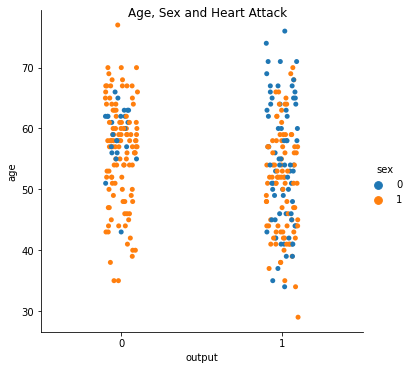

In [11]:
plot=sns.catplot(x="output",y="age",hue="sex",data=heart_df)
plot.fig.suptitle("Age, Sex and Heart Attack")

# Chest Pain and Heart Attack


-- Value 0: typical angina<br>
-- Value 1: atypical angina<br>
-- Value 2: non-anginal pain<br>
-- Value 3: asymptomatic<br>

In [12]:
cp0HeartAttack = ((heart_df.cp == 0) & (heart_df.output == 1)).sum()
cp1HeartAttack = ((heart_df.cp == 1) & (heart_df.output == 1)).sum()
cp2HeartAttack = ((heart_df.cp == 2) & (heart_df.output == 1)).sum()
cp3HeartAttack = ((heart_df.cp == 3) & (heart_df.output == 1)).sum()
print(f'Heart attack with Typical Angina: {cp0HeartAttack}')
print(f'Heart attack with Atypical Angina: {cp1HeartAttack}')
print(f'Heart attack with Non-anginal pain: {cp2HeartAttack}')
print(f'Heart attack with Asymptomatic: {cp3HeartAttack}')

Heart attack with Typical Angina: 39
Heart attack with Atypical Angina: 41
Heart attack with Non-anginal pain: 69
Heart attack with Asymptomatic: 16


# Rest Blood Pressure and Heart Attack

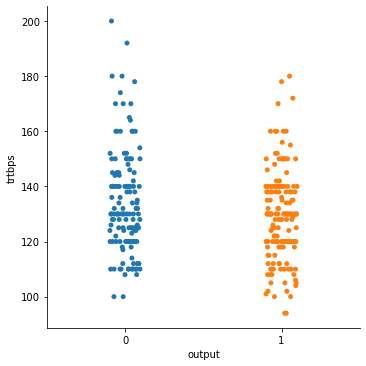

In [13]:
sns.catplot(x="output",y="trtbps", data=heart_df)

#### From this plot it is observed that people might have high or low blood pressure during heart attack. The same thing is also seen from research, that people might have high or low blood pressure during a heart  attack depending on how the body responds to it.
<a href="https://www.medicalnewstoday.com/articles/319319#what-is-the-connection-between-high-blood-pressure-and-heart-attacks">Article on blood pressure and heart attacks</a>

# Cholesterol and Heart Attack

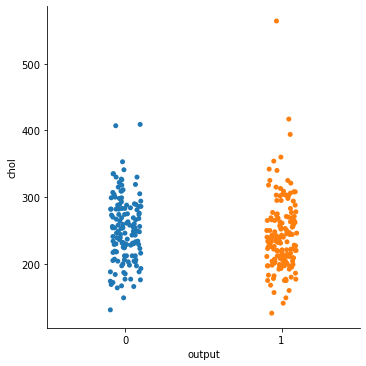

In [14]:
sns.catplot(x="output",y="chol", data=heart_df)

# Fasting Blood Sugar 

(array([258.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

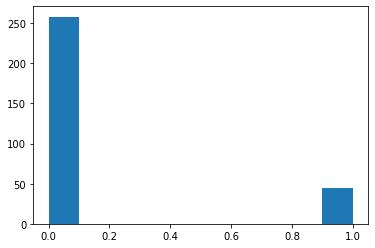

In [15]:
plt.hist(heart_df.fbs)

In [16]:
fbsHeartAttack = ((heart_df.fbs == 1) & (heart_df.output == 1)).sum()
noFbsHeartAttack = ((heart_df.fbs == 0) & (heart_df.output == 1)).sum()
print(f"Fasting blood sugar>120mg/dl who had heart attacks: {fbsHeartAttack}")
print(f"Fasting blood sugar<120mg/dl who had heart attacks: {noFbsHeartAttack}")

Fasting blood sugar>120mg/dl who had heart attacks: 23
Fasting blood sugar<120mg/dl who had heart attacks: 142


# Rest ECG

In [17]:
heart_df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

<p>-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</p>

In [18]:
restecg_output1 = ((heart_df.restecg == 1) & (heart_df.output == 1)).sum()
restecg_output2 = ((heart_df.restecg == 2) & (heart_df.output == 1)).sum()
restecg_output0 = ((heart_df.restecg == 0) & (heart_df.output == 1)).sum()
print(f'Rest ECG having ST-T wave abnormality and Heart Attack: {restecg_output1}')
print(f'Rest ECG showing probable or definite left ventricular hypertrophy and Heart Attack: {restecg_output2}')
print(f'Rest ECG normal and Heart Attack: {restecg_output0}')


Rest ECG having ST-T wave abnormality and Heart Attack: 96
Rest ECG showing probable or definite left ventricular hypertrophy and Heart Attack: 1
Rest ECG normal and Heart Attack: 68


# Maximum Heart Rate Achieved

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

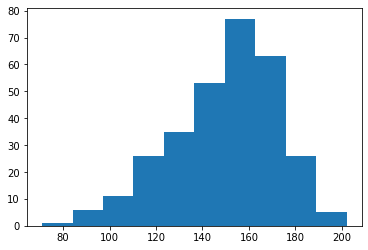

In [19]:
plt.hist(heart_df.thalachh)

Text(0.5, 0.98, 'Maximum Heart Rate Achieved vs Heart Attack')

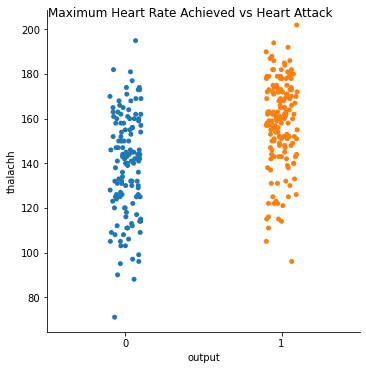

In [20]:
ax = sns.catplot(x="output",y="thalachh",data=heart_df,legend=True)
ax.fig.suptitle("Maximum Heart Rate Achieved vs Heart Attack")

<p> It is observed from research that normal resting heart rate for adults ranges from 60 to 100 beats per minute. However, age is also factor for heart attack.</p>

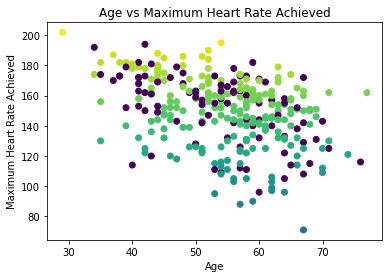

In [21]:
colors_df = pd.DataFrame(heart_df.thalachh)
plt.title("Age vs Maximum Heart Rate Achieved")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
for thal in colors_df.thalachh:
    if thal>50 and thal<100:
        colors_df.thalachh[thal] = 1
    elif thal>100 and thal<130:
        colors_df.thalachh[thal] = 2
    elif thal>130:
        colors_df.thalachh[thal] = 3
    else:
        colors_df.thalachh[thal] = 4
plt
plt.scatter(heart_df.age,heart_df.thalachh, c=colors_df.thalachh)

# Exercise induced angina

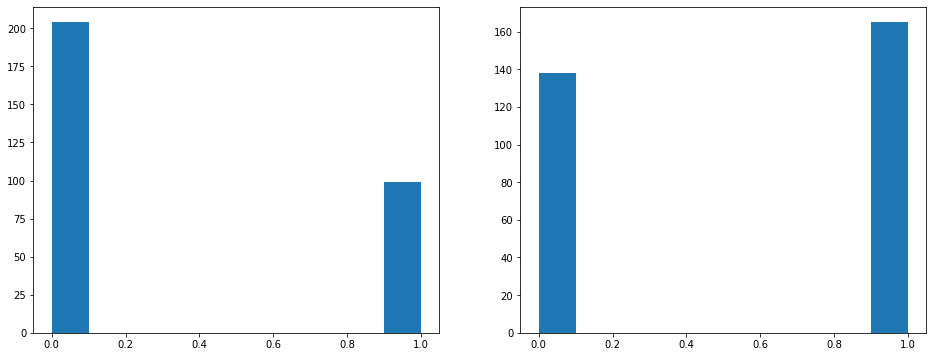

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(heart_df.exng)
plt.subplot(1,2,2)
plt.hist(heart_df.output)
plt.show()

In [23]:
angina1 = ((heart_df.exng == 1) & (heart_df.output == 1)).sum()
print(f"Exercise induced angina and heart attack: {angina1} out of {(heart_df.exng == 1).sum()} patients with exercise induced angina")

Exercise induced angina and heart attack: 23 out of 99 patients with exercise induced angina


# Number of major vessels colored by fluoroscopy

In [24]:
heart_df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

<AxesSubplot:xlabel='caa', ylabel='age'>

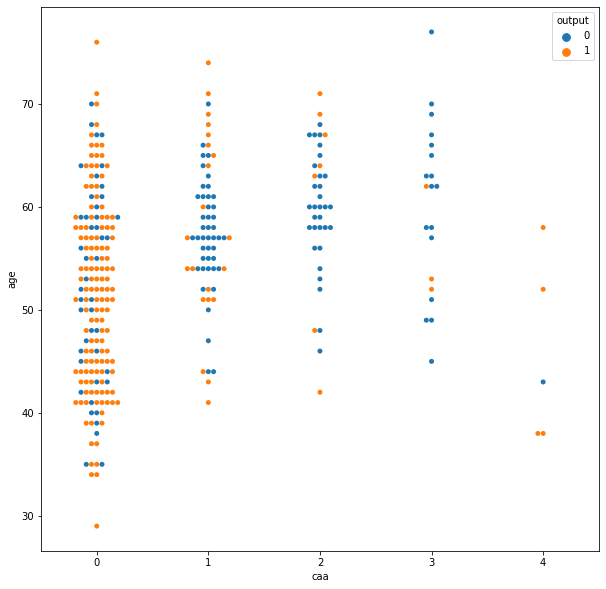

In [25]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=heart_df['caa'],y=heart_df['age'],hue=heart_df['output'])

### From this swarmplot it is seen that caa = 0  has a higher risk of heart attacks

In [26]:
heart_df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

<AxesSubplot:xlabel='thall', ylabel='age'>

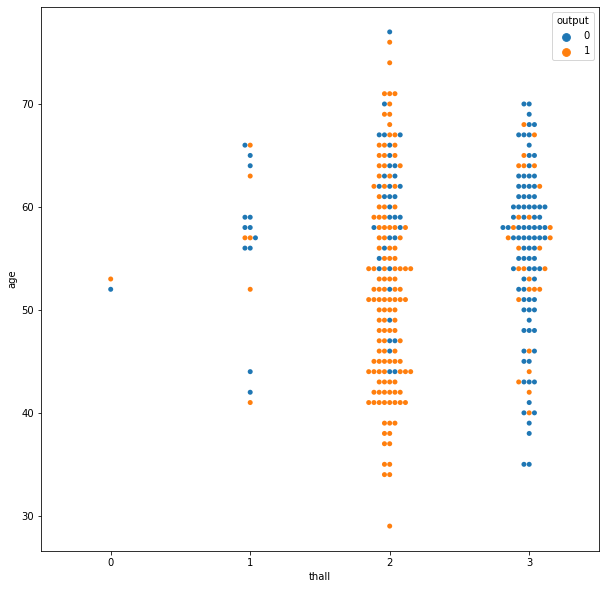

In [27]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=heart_df['thall'],y=heart_df['age'],hue=heart_df['output'])

Slope

In [28]:
heart_df.slp.value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

<AxesSubplot:xlabel='slp', ylabel='age'>

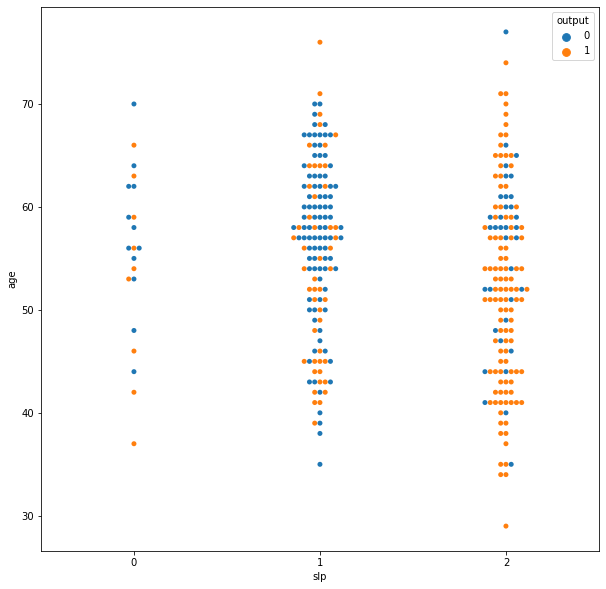

In [29]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=heart_df['slp'],y=heart_df['age'],hue=heart_df['output'])

This shows that with downsloping the chances of heart attack increases

# Old Peak

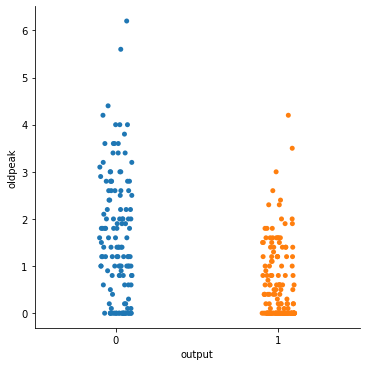

In [30]:
sns.catplot(x="output",y="oldpeak", data=heart_df)

# Machine Learning

<p> All the columns except rest Blood Pressure</p>

In [31]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = heart_df.iloc[:,[0,3,4,7,9,]]
ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_df = pd.concat([scaled_values,heart_df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)

In [32]:
x = scaled_df.iloc[:,:-1]
x.drop("trtbps",axis=1,inplace=True)
y=heart_df.iloc[:,-1].values


In [33]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
X_test

,age,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
225,1.724218,-1.396537,-1.077820,1.346147,1,0,0,1,1,0,0,3
152,1.062485,-0.372287,0.234095,-0.379244,1,3,0,0,0,1,0,3
228,0.511041,0.806568,0.409017,-0.724323,1,3,0,0,0,1,0,3
201,0.621330,0.226803,-0.378132,1.518686,1,0,0,0,1,1,1,3
52,0.841908,-0.294985,-0.159479,0.655990,1,2,0,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
146,-1.143291,-0.082404,-0.028288,-0.638053,0,2,0,1,0,1,1,2
302,0.290464,-0.198357,1.064975,-0.896862,0,1,0,0,0,1,1,2
26,0.511041,-0.662169,0.321556,0.483451,1,2,1,1,0,2,0,2
108,-0.481558,-0.043753,0.540209,0.052103,0,1,0,1,0,2,0,2


In [36]:
keys = ["Logistic Regression", "Decision Tree ", "Random Forest Classifier", "Naive Bayes Classifier", "K Nearest Neighbors Classifier", "Support Vector Machine Classifier"]
values = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]
models = dict(zip(keys,values))

In [37]:
print("Models and accuracy")
for model,algo in models.items():
    classifier = algo
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{model}: {score}")

Models and accuracy
Logistic Regression: 0.8524590163934426
Decision Tree : 0.7540983606557377
Random Forest Classifier: 0.8032786885245902
Naive Bayes Classifier: 0.8032786885245902
K Nearest Neighbors Classifier: 0.8688524590163934
Support Vector Machine Classifier: 0.8524590163934426


# K Nearest Neighbors

In [38]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{k}: {score}")

1: 0.7704918032786885
2: 0.7704918032786885
3: 0.8032786885245902
4: 0.7704918032786885
5: 0.8688524590163934
6: 0.8688524590163934
7: 0.819672131147541
8: 0.8032786885245902
9: 0.819672131147541
10: 0.8032786885245902
11: 0.819672131147541
12: 0.819672131147541
13: 0.819672131147541
14: 0.819672131147541
15: 0.8032786885245902
16: 0.7868852459016393
17: 0.8032786885245902
18: 0.7868852459016393
19: 0.819672131147541
20: 0.8032786885245902
21: 0.819672131147541
22: 0.819672131147541
23: 0.819672131147541
24: 0.819672131147541
25: 0.8032786885245902
26: 0.7868852459016393
27: 0.7868852459016393
28: 0.7868852459016393
29: 0.7868852459016393


# Random Forest Classifier

In [39]:
for k in range(1,30):
    classifier = RandomForestClassifier(n_estimators = k, random_state = 0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{k}: {score}")

1: 0.7213114754098361
2: 0.7377049180327869
3: 0.8032786885245902
4: 0.7868852459016393
5: 0.8524590163934426
6: 0.819672131147541
7: 0.8360655737704918
8: 0.8032786885245902
9: 0.8524590163934426
10: 0.8360655737704918
11: 0.8524590163934426
12: 0.8524590163934426
13: 0.8524590163934426
14: 0.819672131147541
15: 0.8688524590163934
16: 0.8524590163934426
17: 0.819672131147541
18: 0.819672131147541
19: 0.819672131147541
20: 0.8360655737704918
21: 0.8360655737704918
22: 0.819672131147541
23: 0.8360655737704918
24: 0.8524590163934426
25: 0.8032786885245902
26: 0.819672131147541
27: 0.819672131147541
28: 0.819672131147541
29: 0.8360655737704918


## Hyperparameter tuning of Random Forest Classifier

In [40]:
n_estimators = [x for x in range(1,30)]
max_depth = [x for x in range(1,20)]
min_samples_split = [x for x in range(2,6)]
max_leaf_nodes = [x for x in range(2,10)]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split" : min_samples_split,
    "max_leaf_nodes": max_leaf_nodes
}

In [41]:
classifier = RandomForestClassifier(random_state = 0)

In [42]:
#from sklearn.model_selection import GridSearchCV
#rf_grid = GridSearchCV(classifier, param_grid,cv=3,verbose=True, n_jobs = 1)
#rf_grid.fit(X_train,y_train)

In [43]:
#rf_grid.best_params_

#### Best parameters from Grid Search
<p>
 'max_depth': 4<br>
 'max_leaf_nodes': 9,<br>
 'min_samples_split': 2,<br>
 'n_estimators': 18<br>
</p>

In [44]:
classifier = RandomForestClassifier(n_estimators = 18, max_leaf_nodes = 9, min_samples_split = 2, max_depth=4, random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f"Accuracy : {score*100}%")

Accuracy : 88.52459016393442%


<p> The maximum accuracy obtained from the random forest model is 88.525% </p>

In [47]:
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,1,1,1,0,3,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1,3,0,1,0,1,0,3,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,1,1,0,1,2,3,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,0,1,1,1,1,3,0


In [48]:
xNew = scaled_df.iloc[:,:-1]
xNew.drop("trtbps",axis = 1, inplace = True)
xNew = xNew.values

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(xNew,y,test_size = 0.2, random_state=0)